In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/'

#for folder in os.listdir(path + 'train'):
#    print(folder)
#    for image in os.listdir(path + 'train/' + folder):
#        print("")

In [3]:
train_data = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train/'
test_data = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test/'

#import cv2
#train_heights = []
#train_widths = []

#for folder in os.listdir(path + 'train'):
#    print(folder)
#    for image in os.listdir(path + 'train/' + folder):
#        img = cv2.imread(train_data + folder + '/' + image)
#        height, width = img.shape[:2]
#        train_heights.append(height)
#        train_widths.append(width)
#        print(img.shape)
        

In [4]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 1
height, width = 256, 256
train_datagen = ImageDataGenerator(rescale=1. / 255)
  
test_datagen = ImageDataGenerator(rescale=1. / 255)
  
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical')
  
validation_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical')

i = train_generator[1]
print(i)

print(train_generator.labels)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
(array([[[[0.01960784, 0.01960784, 0.01960784],
         [0.19215688, 0.19215688, 0.19215688],
         [0.19215688, 0.19215688, 0.19215688],
         ...,
         [0.19215688, 0.19215688, 0.19215688],
         [0.19215688, 0.19215688, 0.19215688],
         [0.19215688, 0.19215688, 0.19215688]],

        [[0.19215688, 0.19215688, 0.19215688],
         [0.19215688, 0.19215688, 0.19215688],
         [0.19215688, 0.19215688, 0.19215688],
         ...,
         [0.19215688, 0.19215688, 0.19215688],
         [0.19215688, 0.19215688, 0.19215688],
         [0.19215688, 0.19215688, 0.19215688]],

        [[0.19607845, 0.19607845, 0.19607845],
         [0.19215688, 0.19215688, 0.19215688],
         [0.19215688, 0.19215688, 0.19215688],
         ...,
         [0.19215688, 0.19215688, 0.19215688],
         [0.19215688, 0.19215688, 0.19215688],
         [0.19215688, 0.19215688, 0.19215688]],

        ...,

        [[

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, Activation, Dropout, Flatten, Dense, Input
import tensorflow as tf
from tensorflow import keras

In [6]:
num_filters = 16
kernel_size = (3,3)
lrate =.00005
tf.keras.backend.clear_session()

model = Sequential([
    Input(shape=(256,256,3)),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

opt=tf.keras.optimizers.Adam(learning_rate=lrate,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)

model.compile(optimizer=opt, loss='mean_absolute_error', metrics=['categorical_accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives()])

print(model.summary())

2023-01-23 17:46:01.859304: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 16)      2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 250, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 123, 123, 16)      2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 121, 121, 16)      2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 119, 119, 16)      2

In [7]:
history = model.fit(x=train_generator, validation_data=validation_generator, epochs=20)

2023-01-23 17:46:02.951085: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
251/251 [==============================] - 44s 165ms/step - loss: 0.3814 - categorical_accuracy: 0.4343 - recall: 0.4223 - true_positives: 106.0000 - true_negatives: 368.0000 - false_positives: 134.0000 - false_negatives: 145.0000 - val_loss: 0.3603 - val_categorical_accuracy: 0.4242 - val_recall: 0.4242 - val_true_positives: 28.0000 - val_true_negatives: 95.0000 - val_false_positives: 37.0000 - val_false_negatives: 38.0000
Epoch 2/20
251/251 [==============================] - 41s 163ms/step - loss: 0.3120 - categorical_accuracy: 0.5378 - recall: 0.5378 - true_positives: 135.0000 - true_negatives: 386.0000 - false_positives: 116.0000 - false_negatives: 116.0000 - val_loss: 0.2520 - val_categorical_accuracy: 0.6061 - val_recall: 0.6061 - val_true_positives: 40.0000 - val_true_negatives: 106.0000 - val_false_positives: 26.0000 - val_false_negatives: 26.0000
Epoch 3/20
251/251 [==============================] - 41s 163ms/step - loss: 0.2024 - categorical_accuracy: 0.6972 - reca

In [8]:
import matplotlib.pyplot as plt

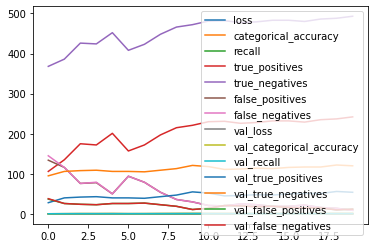

In [9]:
pd.DataFrame(history.history).plot()
plt.show()

This model seems to be overfitting the training dataset. Adding dropout

In [10]:
num_filters = 16
kernel_size = (3,3)
lrate =.00005
tf.keras.backend.clear_session()

model_2 = Sequential([
    Input(shape=(256,256,3)),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.3),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

opt=tf.keras.optimizers.Adam(learning_rate=lrate,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)

model_2.compile(optimizer=opt, loss='mean_absolute_error', metrics=['categorical_accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives()])

print(model_2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 16)      2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 250, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 123, 123, 16)      2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 121, 121, 16)      2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 119, 119, 16)      2

In [11]:
history_2 = model_2.fit(x=train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
251/251 [==============================] - 47s 178ms/step - loss: 0.3772 - categorical_accuracy: 0.4462 - recall: 0.4263 - true_positives: 107.0000 - true_negatives: 374.0000 - false_positives: 128.0000 - false_negatives: 144.0000 - val_loss: 0.2727 - val_categorical_accuracy: 0.6515 - val_recall: 0.6515 - val_true_positives: 43.0000 - val_true_negatives: 109.0000 - val_false_positives: 23.0000 - val_false_negatives: 23.0000
Epoch 2/20
251/251 [==============================] - 43s 172ms/step - loss: 0.2184 - categorical_accuracy: 0.6853 - recall: 0.6853 - true_positives: 172.0000 - true_negatives: 423.0000 - false_positives: 79.0000 - false_negatives: 79.0000 - val_loss: 0.2632 - val_categorical_accuracy: 0.6061 - val_recall: 0.6061 - val_true_positives: 40.0000 - val_true_negatives: 106.0000 - val_false_positives: 26.0000 - val_false_negatives: 26.0000
Epoch 3/20
251/251 [==============================] - 43s 172ms/step - loss: 0.2091 - categorical_accuracy: 0.6892 - recal

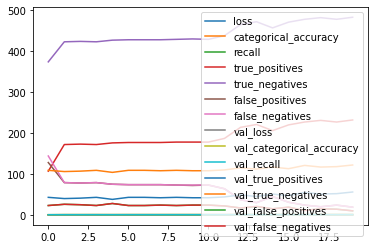

In [12]:
pd.DataFrame(history_2.history).plot()
plt.show()

In [13]:
num_filters = 16
kernel_size = (3,3)
lrate =.0005
tf.keras.backend.clear_session()

model_3 = Sequential([
    Input(shape=(256,256,3)),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.3),
    Dense(512, activation='relu'),
    Dropout(.3),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

opt=tf.keras.optimizers.Adam(learning_rate=lrate,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)

model_3.compile(optimizer=opt, loss='mean_absolute_error', metrics=['categorical_accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives()])

print(model_3.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 16)      2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 250, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 123, 123, 16)      2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 121, 121, 16)      2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 119, 119, 16)      2

In [14]:
history_3 = model_3.fit(x=train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
251/251 [==============================] - 46s 173ms/step - loss: 0.3743 - categorical_accuracy: 0.4382 - recall: 0.4343 - true_positives: 109.0000 - true_negatives: 362.0000 - false_positives: 140.0000 - false_negatives: 142.0000 - val_loss: 0.4040 - val_categorical_accuracy: 0.3939 - val_recall: 0.3939 - val_true_positives: 26.0000 - val_true_negatives: 92.0000 - val_false_positives: 40.0000 - val_false_negatives: 40.0000
Epoch 2/20
251/251 [==============================] - 42s 167ms/step - loss: 0.3718 - categorical_accuracy: 0.4422 - recall: 0.4422 - true_positives: 111.0000 - true_negatives: 362.0000 - false_positives: 140.0000 - false_negatives: 140.0000 - val_loss: 0.4040 - val_categorical_accuracy: 0.3939 - val_recall: 0.3939 - val_true_positives: 26.0000 - val_true_negatives: 92.0000 - val_false_positives: 40.0000 - val_false_negatives: 40.0000
Epoch 3/20
251/251 [==============================] - 42s 167ms/step - loss: 0.3718 - categorical_accuracy: 0.4422 - recal

Adding padding 

In [15]:
num_filters = 16
kernel_size = (3,3)
lrate =.00005
padding = 'same'
tf.keras.backend.clear_session()

model_4 = Sequential([
    Input(shape=(256,256,3)),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.3),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

opt=tf.keras.optimizers.Adam(learning_rate=lrate,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)

model_4.compile(optimizer=opt, loss='mean_absolute_error', metrics=['categorical_accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives()])

print(model_4.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 16)      2

In [16]:
history_4 = model_4.fit(x=train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
251/251 [==============================] - 48s 184ms/step - loss: 0.3750 - categorical_accuracy: 0.4781 - recall: 0.4024 - true_positives: 101.0000 - true_negatives: 391.0000 - false_positives: 111.0000 - false_negatives: 150.0000 - val_loss: 0.2821 - val_categorical_accuracy: 0.6061 - val_recall: 0.6061 - val_true_positives: 40.0000 - val_true_negatives: 109.0000 - val_false_positives: 23.0000 - val_false_negatives: 26.0000
Epoch 2/20
251/251 [==============================] - 45s 181ms/step - loss: 0.1804 - categorical_accuracy: 0.7530 - recall: 0.7331 - true_positives: 184.0000 - true_negatives: 444.0000 - false_positives: 58.0000 - false_negatives: 67.0000 - val_loss: 0.2196 - val_categorical_accuracy: 0.6515 - val_recall: 0.6515 - val_true_positives: 43.0000 - val_true_negatives: 111.0000 - val_false_positives: 21.0000 - val_false_negatives: 23.0000
Epoch 3/20
251/251 [==============================] - 45s 179ms/step - loss: 0.0875 - categorical_accuracy: 0.8884 - recal

Adding a global max pooling layer

In [17]:
num_filters = 16
kernel_size = (3,3)
lrate =.00005
padding = 'same'
tf.keras.backend.clear_session()

model_5 = Sequential([
    Input(shape=(256,256,3)),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu'),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu'),
    MaxPooling2D(),
    GlobalMaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.3),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

opt=tf.keras.optimizers.Adam(learning_rate=lrate,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)

model_5.compile(optimizer=opt, loss='mean_absolute_error', metrics=['categorical_accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives()])

print(model_5.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 16)      2

In [18]:
history_5 = model_5.fit(x=train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
251/251 [==============================] - 28s 105ms/step - loss: 0.4424 - categorical_accuracy: 0.4303 - recall: 0.0000e+00 - true_positives: 0.0000e+00 - true_negatives: 502.0000 - false_positives: 0.0000e+00 - false_negatives: 251.0000 - val_loss: 0.4405 - val_categorical_accuracy: 0.3939 - val_recall: 0.0000e+00 - val_true_positives: 0.0000e+00 - val_true_negatives: 132.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 66.0000
Epoch 2/20
251/251 [==============================] - 26s 102ms/step - loss: 0.4158 - categorical_accuracy: 0.4422 - recall: 0.2709 - true_positives: 68.0000 - true_negatives: 417.0000 - false_positives: 85.0000 - false_negatives: 183.0000 - val_loss: 0.4122 - val_categorical_accuracy: 0.3939 - val_recall: 0.3939 - val_true_positives: 26.0000 - val_true_negatives: 92.0000 - val_false_positives: 40.0000 - val_false_negatives: 40.0000
Epoch 3/20
251/251 [==============================] - 26s 102ms/step - loss: 0.3752 - categorical_accurac

As I expected, this didn't work. Removing the global max pooling layer.

Now adding in kernel regularization

In [19]:
num_filters = 16
kernel_size = (3,3)
lrate =.00005
padding = 'same'
l2 = .00033
tf.keras.backend.clear_session()

model_6 = Sequential([
    Input(shape=(256,256,3)),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2)),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2)),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2)),
    MaxPooling2D(),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2)),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2)),
    Conv2D(filters=num_filters,kernel_size=kernel_size, padding=padding, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2)),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.3),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

opt=tf.keras.optimizers.Adam(learning_rate=lrate,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)

model_6.compile(optimizer=opt, loss='mean_absolute_error', metrics=['categorical_accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives()])

print(model_6.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 16)      2

In [20]:
history_6 = model_6.fit(x=train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
251/251 [==============================] - 49s 185ms/step - loss: 0.3406 - categorical_accuracy: 0.5378 - recall: 0.4900 - true_positives: 123.0000 - true_negatives: 415.0000 - false_positives: 87.0000 - false_negatives: 128.0000 - val_loss: 0.3385 - val_categorical_accuracy: 0.5152 - val_recall: 0.5152 - val_true_positives: 34.0000 - val_true_negatives: 101.0000 - val_false_positives: 31.0000 - val_false_negatives: 32.0000
Epoch 2/20
251/251 [==============================] - 46s 185ms/step - loss: 0.2413 - categorical_accuracy: 0.6813 - recall: 0.6733 - true_positives: 169.0000 - true_negatives: 423.0000 - false_positives: 79.0000 - false_negatives: 82.0000 - val_loss: 0.3228 - val_categorical_accuracy: 0.5455 - val_recall: 0.5455 - val_true_positives: 36.0000 - val_true_negatives: 102.0000 - val_false_positives: 30.0000 - val_false_negatives: 30.0000
Epoch 3/20
251/251 [==============================] - 47s 187ms/step - loss: 0.1925 - categorical_accuracy: 0.7450 - recall